# Machine Learning

## Level 2

In [1]:
import pandas as pd

In [2]:
melbourne_data = pd.read_csv('melb_data.csv')

## Handling Missing Values

In [5]:
print(melbourne_data.isnull().sum())

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64


### 1. Drop columns with missing values

In [8]:
melb1_data = pd.read_csv('melb_data.csv')
melb1_data.shape

(18396, 22)

In [9]:
melb1_data_clean = melb1_data.dropna(axis=1)
melb1_data_clean.shape

(18396, 9)

### or

In [10]:
melb2_data = pd.read_csv('melb_data.csv')
melb2_data.shape

(18396, 22)

In [13]:
col_with_missingVal =[col for col in melb2_data.columns if melb2_data[col].isnull().any()]

melb2_clean_data = melb2_data.drop(col_with_missingVal, axis=1)

melb2_clean_data.shape

(18396, 9)

### 2. Imputation

In [18]:
from sklearn.preprocessing import Imputer

# melb3_data = pd.read_csv('melb_data.csv')
# my_imputer = Imputer()
# melb3_with_imputed_values = my_imputer.fit_transform(melb3_data)

### Examples

In [39]:
import pandas as pd

melb_data = pd.read_csv('melb_data.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'],axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, melb_target, train_size = 0.7, test_size = 0.3,random_state = 0)

In [41]:
def score_dataset(X_train, X_test, y_train, y_test):
    model= RandomForestRegressor()
    model.fit(X_train, y_train)
    preds= model.predict(X_test)
    return mean_absolute_error(y_test, preds)

### Using dropping Missing Values

In [35]:
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)

print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train,reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
347554.632741


### Using Imputations

In [36]:
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.fit_transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Imputation:
203607.157547


### Get Score from Imputation with Extra Columns Showing What Was Imputed

In [44]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns if X_train[col].isnull().any())

for col in cols_with_missing:
    imputed_X_train_plus[col +'_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col +'_was_missing'] = imputed_X_test_plus[col].isnull()

#Imputation
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.fit_transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from Imputation while Track What Was Imputed:
202917.448505


## Using Categorical Data with One-Hot-Encoding

In [1]:
# Read the data
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Drop houses where the target is missing
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

target = train_data.SalePrice

# Since missing values isn't the focus of this tutorial, we use the simplest
# possible approach, which drops these columns. 
# For more detail (and a better approach) to missing values, see
# https://www.kaggle.com/dansbecker/handling-missing-values
cols_with_missing = [col for col in train_data.columns 
                                 if train_data[col].isnull().any()]                                  
candidate_train_predictors = train_data.drop(['Id', 'SalePrice'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['Id'] + cols_with_missing, axis=1)

# "cardinality" means the number of unique values in a column.
# We use it as our only way to select categorical columns here. This is convenient, though
# a little arbitrary.
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [2]:
train_predictors.dtypes.sample(10)

BedroomAbvGr     int64
GarageArea       int64
ExterCond       object
Utilities       object
ScreenPorch      int64
LotShape        object
LotArea          int64
ExterQual       object
MSSubClass       int64
Condition2      object
dtype: object

In [4]:
#Pandas offers a convenient function called get_dummies to get one-hot encodings

one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 18407
Mean Abslute Error with One-Hot Encoding: 18091


In [6]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

## Learning to Use XGBoost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'],axis=1).select_dtypes(exclude=["object"])

train_X,test_X,train_y,test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.fit_transform(test_X)

In [2]:
from xgboost import XGBRegressor

my_model = XGBRegressor()

# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

C:\Users\user\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [7]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ' + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error: 16609.2439105


## Model tunning

**n_estimator** specifies how many times to go through the modeling cycle. in the *underfitting vs overfitting graph* n_estimator moves you further to the right.

**early_stopping_rounds** offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimator. **Early_stopping_rounds = 5** is reasonable value, thus we stop after 5 straight rounds of deteriorating validation scores.

In [9]:
may_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In general, a small **learning_rate** (and large number of estimators) will yeild more accure XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

Modifying the example above to include a learning rate would yield the following code:

In [11]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X,test_y)], verbose=False)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

**n_jobs**<br>
On larger datasets where runtime is a consideration, you can use parallelism to build your models faster. It's common to set the parameter **n_jobs** equal to the number of cores on your machine. On smaller datasets, this won't help.

XGBoost is currently the dominant algorithm for building accurate models on conventional data(also called tabular or structured data).

## Partial Dependence Plots

### What are Partial Dependence Plots?
Partial dependence plots show how each variable or predictor affects the model's predictions. This is useful for questions like:

>How much of wage differences between men and women are due solely to gender, as opposed to differences in education backgrounds or work experience?

>Controlling for house characteristics, what impact do longitude and latitude have on home prices? To restate this, we want to understand how similarly sized houses would be priced in different areas, even if the homes actually at these sites are different sizes.

>Are health differences between two groups due to differences in their diets, or due to other factors?

If you are familiar with linear or logistic regression models, partial dependence plots can be interepreted similarly to the coefficients in those models. But partial dependence plots can capture more complex patterns from your data, and they can be used with any model. 

### Interpreting Partial Dependence Plots

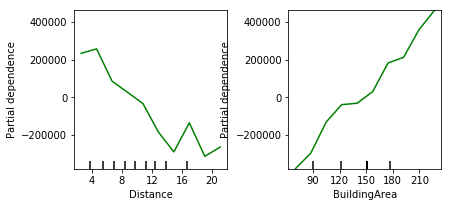

In [23]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

cols_to_use =['Distance','Landsize','BuildingArea']

def get_some_data():
    data = pd.read_csv('melb_data.csv')
    
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X,y

X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X,y)
my_plots = plot_partial_dependence(my_model, features=[0,2], X=X, feature_names=cols_to_use, grid_resolution=10)

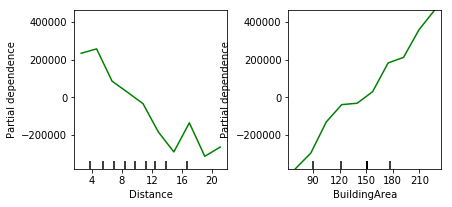

In [24]:
%matplotlib inline
# get_some_data
X, y = get_some_data()

# Scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
#this was due to an implementation details, and a future release will support all model types.
my_model = GradientBoostingRegressor()

# fir the model as usual
my_model.fit(X, y)

# Here we make the plot
my_plots = plot_partial_dependence(my_model, features=[0,2], # column numbers of plots we want to show
                                  X=X, # raw predictor data.
                                  feature_names=['Distance','Landsize','BuildingArea'], # Labels on graphs
                                  grid_resolution=10) # number of values to plot on x axis

Some tips related to plot_partial_dependence:

1. The features are the column numbers from the X array or dataframe that you wish to have plotted. This starts to look bad beyond 2 or 3 variables. You could make repeated calls to plot 2 or 3 at a time.

2. There are options to establish what points on the horizontal axis are plotted. The simplest is grid_resolution which we use to determine how many different points are plotted. These plots tend to look jagged as that value increases, because you will pick up lots of randomness or noise in your model. It's best not to take the small or jagged fluctuations too literally. Smaller values of grid_resolution smooth this out. It's also much less of an issue for datasets with many rows.

3. There is a function called partial_dependence to get the raw data making up this plot, rather than making the visual plot itself. This is useful if you want to control how it is visualized using a plotting package like Seaborn. With moderate effort, you could make much nicer looking plots.

## Pipeline

Pipelines are a simple way to keep your data processing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read Data
data = pd.read_csv('melb_data.csv')
cols_to_use = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt']

X = data[cols_to_use]
y = data.Price

train_X,test_X, train_y, test_y = train_test_split(X,y)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)

print(predictions)

[  660340.38371847   556696.87878788   595323.0012384  ...,  1473000.
   696900.           546012.58644134]


For comparison, here is the code to do the same thing without pipelines

In [4]:
my_imputer = Imputer()
my_model = RandomForestRegressor()

imputed_train_X = my_imputer.fit_transform(train_X)
imputed_test_X = my_imputer.fit_transform(test_X)
my_model.fit(imputed_train_X, train_y)
predictions = my_model.predict(imputed_test_X)

print(predictions)

[  704470.28968651   744925.           801500.         ...,  1203900.
   726000.           736900.        ]


This particular pipeline was only a small improvement in code elegance. But pipelines become increasingly valuable as your data processing becomes increasingly sophisticated.

## Cross Validation

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.

In [1]:
# First we read the data
import pandas as pd

data = pd.read_csv('melb_data.csv')
cols_to_use = ['Rooms','Distance','Landsize','BuildingArea','YearBuilt']

X = data[cols_to_use]
y = data.Price

In [4]:
# Then specify a pipeline of our modeling steps
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())


In [5]:
# Finally get the cross-validation scores:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-321671.17977157 -305229.07175671 -282175.01153187]


In [9]:
print('Mean Absolute Error %2f' %(-1*scores.mean()))

Mean Absolute Error 303025.087687


Using cross-validation gave us much better measures of model quality, with the added benefit of cleaning up our code (no longer needing to keep track of separate train and test sets. So, it's a good win.

## Data Leakage

### What is data leakage

Data leakage is one of the most important issues for a data scientist to understand. If you don't know how to prevent it, leakage will come up frequently, and it will ruin your models in the most subtle and dangerous ways. Specifically, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate. This tutorial will show you what leakage is and how to avoid it.<br>

There are two main types of leakage: **Leaky Predictors** and a **Leaky Validation Strategies**.

**Leaky Predictors** This occurs when your predictors include data that will not be available at the time you make predictions.<br>
**Leaky Validation Strategies** A much different type of leak occurs when you aren't careful distinguishing training data from validation data.

**Preventing Leaky Predictors**<br>
There is no single solution that universally prevents leaky predictors. It requires knowledge about your data, case-specific inspection and common sense.

However, leaky predictors frequently have high statistical correlations to the target. So two tactics to keep in mind:
- To screen for possible leaky predictors, look for columns that are statistically correlated to your target.<br>
- If you build a model and find it extremely accurate, you likely have a leakage problem.

**Preventing Leaky Validation Strategies**<br>
If your validation is based on a simple train-test split, exclude the validation data from any type of fitting, including the fitting of preprocessing steps. This is easier if you use scikit-learn Pipelines. When using cross-validation, it's even more critical that you use pipelines and do your preprocessing inside the pipeline.

In [10]:
import pandas as pd

data = pd.read_csv('AER_credit_card_data.csv', true_values =['yes'], false_values=['no'])
print(data.head())

   card  reports       age  income     share  expenditure  owner  selfemp  \
0  True        0  37.66667  4.5200  0.033270   124.983300   True    False   
1  True        0  33.25000  2.4200  0.005217     9.854167  False    False   
2  True        0  33.66667  4.5000  0.004156    15.000000   True    False   
3  True        0  30.50000  2.5400  0.065214   137.869200  False    False   
4  True        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [11]:
data.shape

(1319, 12)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

y = data.card
X = data.drop(['card'], axis=1)

# Since there was no preprocessing, we didn't need a pipeline here. Used anyway as best practice
modeling_pipeline = make_pipeline(RandomForestClassifier())
cv_scores = cross_val_score(modeling_pipeline, X, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.976494


In [16]:
expenditures_cardholders = data.expenditure[data.card]
expenditures_noncardholders = data.expenditure[~data.card]

print('Fraction of those who received a card with no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))
print('Fraction of those who received a card with no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))

Fraction of those who received a card with no expenditures: 0.02
Fraction of those who received a card with no expenditures: 1.00


In [17]:
potential_leaks = ['expenditure', 'share', 'active', 'majorcards']
X2 = X.drop(potential_leaks, axis=1)
cv_scores = cross_val_score(modeling_pipeline, X2, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.805919


Data leakage can be multi-million dollar mistake in many data science applications. Careful separation of training and validation data is a first step, and pipelines can help implement this separation. Leaking predictors are a more frequent issue, and leaking predictors are harder to track down. A combination of caution, common sense and data exploration can help identify leaking predictors so you remove them from your model.